In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("/sathwik/mini_projects/2.CompanyProfitPrediction/dataset/50_Startups.csv")
print(data.head())

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [14]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [15]:
X=data.iloc[:,:-1]
Y=data.Profit
X.head()
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

<Axes: xlabel='Profit', ylabel='Count'>

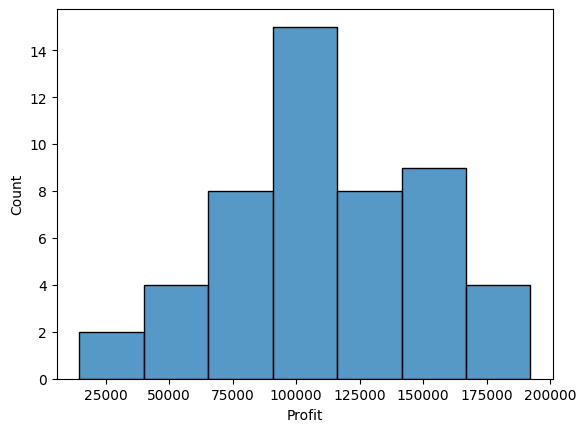

In [16]:
# Find relation between profit through histogram
sns.histplot(data.Profit)

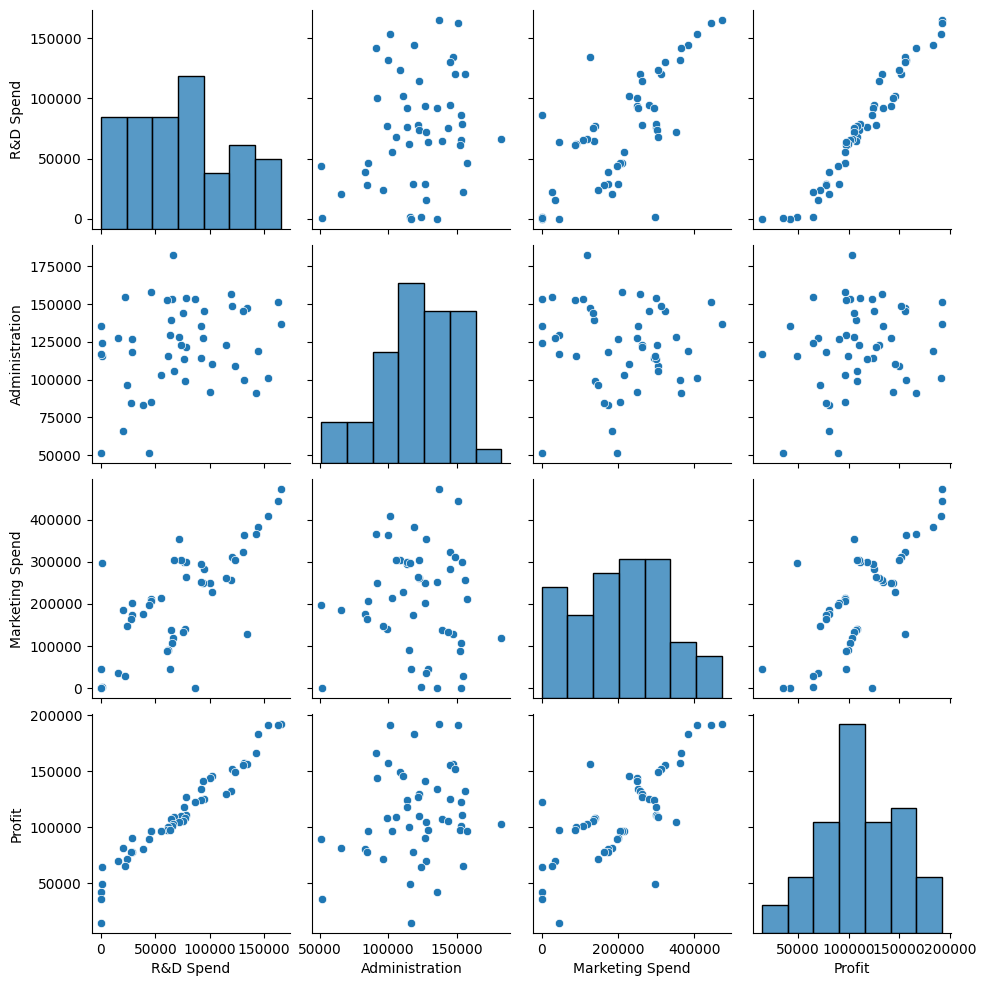

In [17]:
sns.pairplot(data)

## Preparing test and train data

In [18]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(X,Y,test_size=0.2,random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(x1,y1)

LinearRegression()

In [20]:
# Accuracy of Linear Regression Model
accu=model_linear.score(x2,y2)*100
print("{:.2f}%".format(accu))

90.01%


In [21]:
new_arr=[170450,140900,850000]
new_arr=np.array(new_arr).reshape(1,-1)

In [22]:
profit=model_linear.predict(new_arr)[0]
print("Profit would be:{:.2f}/-".format(profit))

Profit would be:208060.15/-


# Using Random Forest for same prediction

In [23]:
data=pd.read_csv('datasets/50_Startups.csv')
print(data.head())

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


## Define function to reshape inputs to pass to prediction model

In [24]:
def reshape(arr):
    arr=np.array(arr).reshape(1,-1)
    return arr

In [25]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Split columns which are input & output

In [26]:
from sklearn.model_selection import train_test_split
X=data.drop(['Profit'],axis=1)
y=data['Profit']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Join the data to perform any manipulations further
This acts as duplicate of 'data' DataFrame

In [28]:
train_data = X_train.join(y_train)

In [29]:
train_data.head()

,R&D Spend,Administration,Marketing Spend,Profit
28,66051.52,182645.56,118148.20,103282.38
16,78013.11,121597.55,264346.06,126992.93
12,93863.75,127320.38,249839.44,141585.52
4,142107.34,91391.77,366168.42,166187.94
46,1315.46,115816.21,297114.46,49490.75


array([[<Axes: title={'center': 'R&D Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

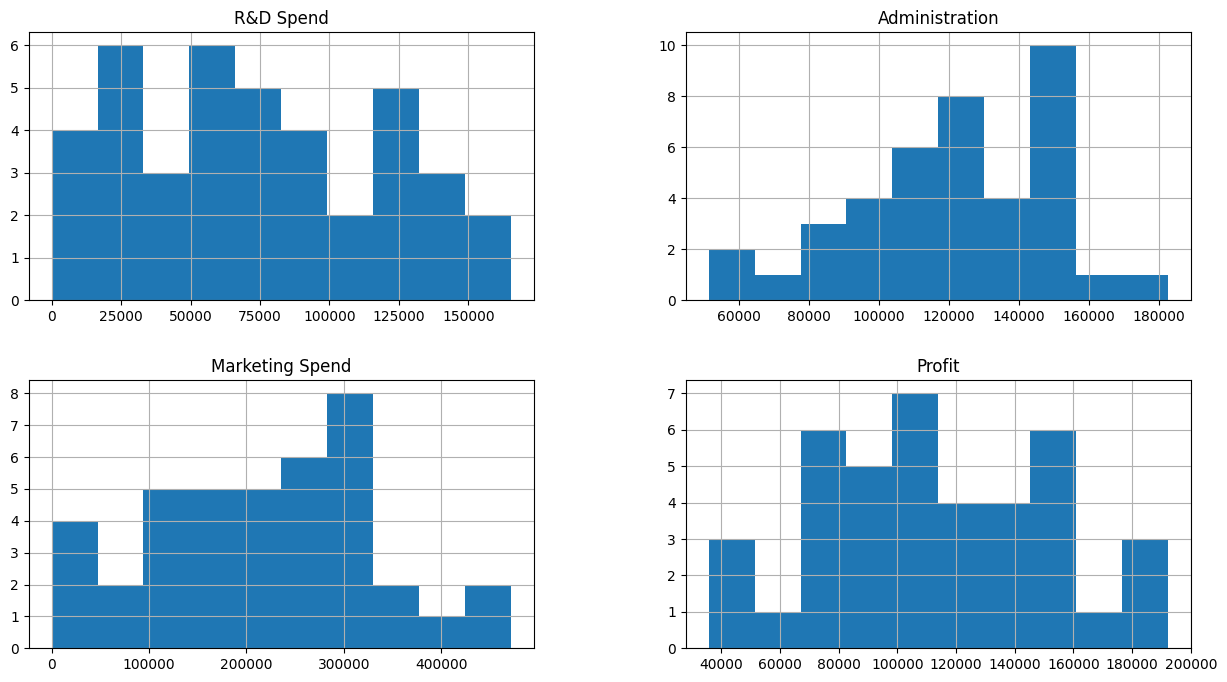

In [30]:
# Draw Histogram to figure out the data
train_data.hist(figsize=(15,8))

<Axes: >

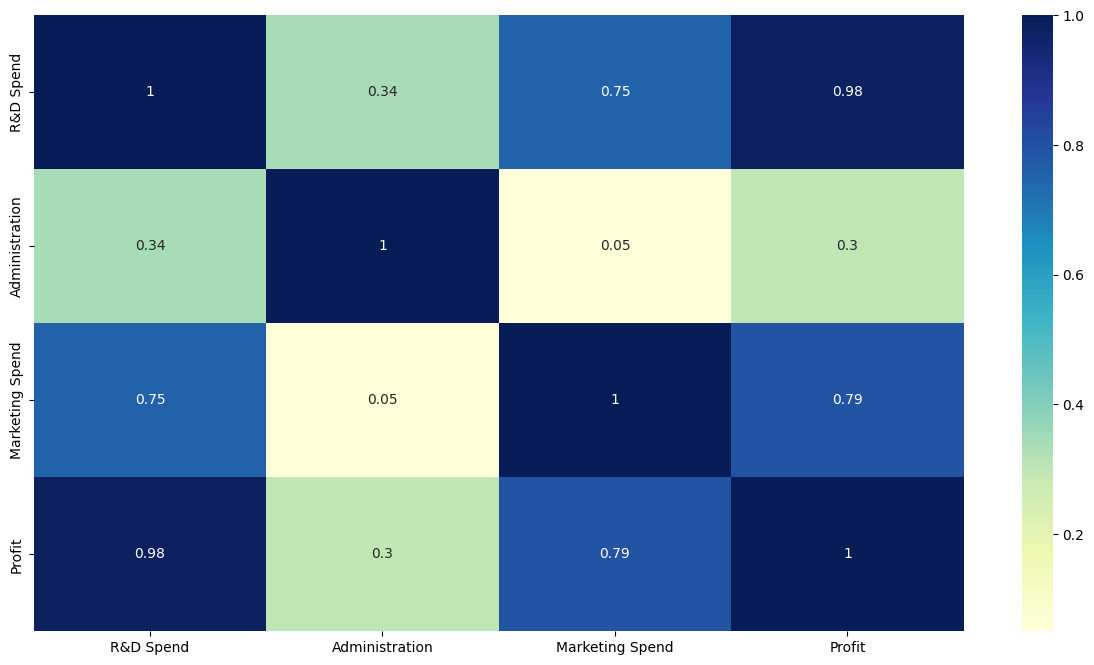

In [31]:
# Heat map to find correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [32]:
train_data.head()

,R&D Spend,Administration,Marketing Spend,Profit
28,66051.52,182645.56,118148.20,103282.38
16,78013.11,121597.55,264346.06,126992.93
12,93863.75,127320.38,249839.44,141585.52
4,142107.34,91391.77,366168.42,166187.94
46,1315.46,115816.21,297114.46,49490.75


## Transform the train_data to have logarithmic bell curve

In [33]:
train_data['R&D Spend']=np.log(train_data['R&D Spend']+1)
train_data['Administration']=np.log(train_data['Administration']+1)
train_data['Marketing Spend']=np.log(train_data['Marketing Spend']+1)
train_data['Profit']=np.log(train_data['Profit']+1)

array([[<Axes: title={'center': 'R&D Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

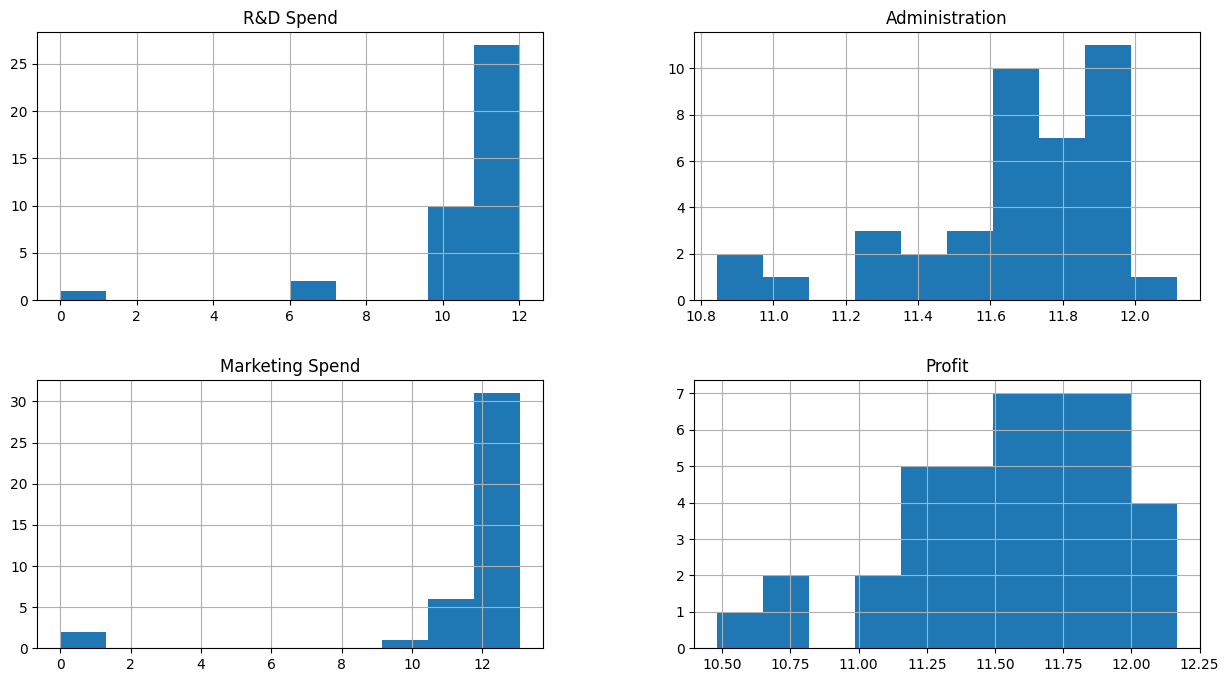

In [34]:
train_data.hist(figsize=(15,8))

## Train the Random Forest Regerssor

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
# Find Accuracy of the model
forest.score(X_test,y_test)

0.8825410072149689

In [37]:
vals=[250000,350000,150000]
vals=reshape(vals)
forest.predict(vals)[0]

172032.17859999998

## Further more imporve the Random Forest by tweaking properties and training again

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[30,50,100],
    'max_features':[8,12,20],
    'min_samples_split':[2,4,6,8]
}

grid_search=GridSearchCV(forest,param_grid,cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
best_forest=grid_search.best_estimator_

## Calculate Accuracy of imporved random forest

In [40]:
best_forest.score(X_test,y_test)

0.8831649887791584

In [41]:
linear_accuracy=model_linear.score(X_test,y_test)*100
forest_accuracy=forest.score(X_test,y_test)*100
best_forest_accuracy=best_forest.score(X_test,y_test)*100

print("Linear Regression Accuracy is:{:.2f}%".format(linear_accuracy))
print("Simple random forest Accuracy is:{:.2f}%".format(forest_accuracy))
print("Optimized random forest Accuracy is:{:.2f}%".format(best_forest_accuracy))

Linear Regression Accuracy is:90.41%
Simple random forest Accuracy is:88.25%
Optimized random forest Accuracy is:88.32%


# Linear Regression is most accurate, therefore will use that
1. Save all models into disk

In [42]:
import pickle as pkl

linear_name="linear_model.sav"
forest_name='forest_model.sav'
best_forest_name='best_forest_model.sav'

pkl.dump(model_linear,open(linear_name,'bw'))
pkl.dump(forest,open(forest_name,'bw'))
pkl.dump(best_forest,open(best_forest_name,'bw'))

print("Linear model saved as:",linear_name)
print("Basic Forest model saved as:",forest_name)
print("Best Forest model saved as:",best_forest_name)

Linear model saved as: linear_model.sav
Basic Forest model saved as: forest_model.sav
Best Forest model saved as: best_forest_model.sav
